In [1]:
import json
import requests
from typing import Tuple, Dict, List, Union
from collections import Counter

import numpy as np
import networkx as nx
import altair as alt
import seaborn as sns
import pandas as pd
from IPython.display import display

In [2]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
# nodes = pd.read_csv('https://raw.githubusercontent.com/jjmmwon/VAST-Challenge-2023-MC3/main/data/all_unique_nodes.csv')
nodes = pd.read_csv('./data/all_unique_nodes.csv')
# links = pd.read_csv('https://raw.githubusercontent.com/jjmmwon/VAST-Challenge-2023-MC3/main/data/links_with_weight.csv')

In [4]:
nodes

,id,country,product_services,revenue_omu,type,type_length,is_source,is_target,weighted_degree,degree,total_revenue,type_set,neighbor_BO,neighbor_CC,total_rev_per_BO,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
0,Jones LLC,ZH,"['Automobiles', 'Unknown']","['None', 310612303.447]","{'Company': 1, 'Beneficial Owner': 5, 'Company...",11,1,0,8,8,310612303,"['Company', 'Beneficial Owner', 'Company Conta...",5,3,62122460.6,1.000000,1.000000,1.000000,7.071062e-01
1,"Coleman, Hall and Lopez",ZH,"['Passenger cars, trucks, vans, and buses']",[162734683.9969],{'Company': 1},1,0,0,0,0,162734683,['Company'],0,0,162734683.0,0.000000,0.000000,0.000000,0.000000e+00
2,Aqua Advancements Sashimi SE Express,Oceanus,['Holding firm whose subsidiaries are engaged ...,[115004666.6728],{'Company': 1},1,1,0,3,3,115004666,['Company'],2,1,57502333.0,1.000000,1.000000,1.000000,7.071069e-01
3,Makumba Ltd. Liability Co,Utoporiana,"['Car service, car parts and accessories, auto...",[90986412.5191],{'Company': 1},1,1,0,13,13,90986412,['Company'],12,1,7582201.0,0.001833,0.005912,0.058608,5.826009e-07
4,"Taylor, Taylor and Farrell",ZH,['Fully electric vehicles (EVs) and electric v...,[81466666.6728],{'Company': 1},1,0,0,0,0,81466666,['Company'],0,0,81466666.0,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51726,Katherine Stewart,Unknown,['Unknown'],['Unknown'],{'Beneficial Owner': 1},1,0,1,1,1,0,['Beneficial Owner'],0,0,0.0,1.000000,0.000000,1.000000,7.071068e-01
51727,Christopher James,Unknown,['Unknown'],['Unknown'],{'Company Contacts': 1},1,0,1,1,1,0,['Company Contacts'],0,0,0.0,1.000000,0.000000,1.000000,7.071068e-01
51728,Jon Maddox,Unknown,['Unknown'],['Unknown'],{'Beneficial Owner': 1},1,0,1,1,1,0,['Beneficial Owner'],0,0,0.0,0.000141,0.000000,0.072768,5.606578e-09
51729,Sandra Eaton,Unknown,['Unknown'],['Unknown'],{'Company Contacts': 1},1,0,1,1,1,0,['Company Contacts'],0,0,0.0,0.000141,0.000000,0.048904,3.747188e-14


In [5]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

from nltk.util import ngrams
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hongdonghee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hongdonghee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hongdonghee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
company_nodes = nodes[nodes['is_source']==1]
company_nodes

,id,country,product_services,revenue_omu,type,type_length,is_source,is_target,weighted_degree,degree,total_revenue,type_set,neighbor_BO,neighbor_CC,total_rev_per_BO,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
0,Jones LLC,ZH,"['Automobiles', 'Unknown']","['None', 310612303.447]","{'Company': 1, 'Beneficial Owner': 5, 'Company...",11,1,0,8,8,310612303,"['Company', 'Beneficial Owner', 'Company Conta...",5,3,6.212246e+07,1.000000,1.000000,1.000000,7.071062e-01
2,Aqua Advancements Sashimi SE Express,Oceanus,['Holding firm whose subsidiaries are engaged ...,[115004666.6728],{'Company': 1},1,1,0,3,3,115004666,['Company'],2,1,5.750233e+07,1.000000,1.000000,1.000000,7.071069e-01
3,Makumba Ltd. Liability Co,Utoporiana,"['Car service, car parts and accessories, auto...",[90986412.5191],{'Company': 1},1,1,0,13,13,90986412,['Company'],12,1,7.582201e+06,0.001833,0.005912,0.058608,5.826009e-07
6,Punjab s Marine conservation,Riodelsol,"['Beef, pork, chicken, and lamb by-products; c...",[72167572.0026],{'Company': 1},1,1,0,6,6,72167572,['Company'],5,1,1.443351e+07,0.666667,0.833333,0.600000,6.858327e-01
7,Assam Limited Liability Company,Utoporiana,['Power and Gas segment (gas and steam turbine...,"[20666.6728, 72162317.2658]",{'Company': 2},2,1,0,15,8,72182983,['Company'],6,2,1.203050e+07,0.089888,0.172370,0.234211,9.263075e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,"Butler, Hendricks and Sherman",Unknown,['Unknown'],['Unknown'],{'Unknown': 1},1,1,0,1,1,0,['Unknown'],1,0,0.000000e+00,1.000000,0.000000,1.000000,7.071068e-01
30462,Ocean Emporium Corporation Distribution,Unknown,['Unknown'],['Unknown'],{'Unknown': 1},1,1,0,2,2,0,['Unknown'],0,2,0.000000e+00,0.666667,0.166667,0.750000,5.000000e-01
30463,"Martinez, Boone and Brooks",Unknown,['Unknown'],['Unknown'],{'Unknown': 1},1,1,0,1,1,0,['Unknown'],1,0,0.000000e+00,0.333333,0.000000,0.500000,3.717482e-01
30464,"Fry, Pope and Edwards",Unknown,['Unknown'],['Unknown'],{'Unknown': 1},1,1,0,1,1,0,['Unknown'],0,1,0.000000e+00,0.000141,0.000000,0.081249,6.371169e-07


In [7]:
nodes['product_services'] = nodes['product_services'].apply(eval)

In [8]:
nodes['product_services_string'] = nodes['product_services'].apply(' | '.join)
nodes['product_services_string']

0                                    Automobiles | Unknown
1                  Passenger cars, trucks, vans, and buses
2        Holding firm whose subsidiaries are engaged in...
3        Car service, car parts and accessories, automo...
4        Fully electric vehicles (EVs) and electric veh...
                               ...                        
51726                                              Unknown
51727                                              Unknown
51728                                              Unknown
51729                                              Unknown
51730                                              Unknown
Name: product_services_string, Length: 51731, dtype: object

In [9]:
nodes["sentences"] = nodes.product_services_string.apply(lambda x: nltk.sent_tokenize(x))
nodes["num_sentences"] = nodes.sentences.apply(lambda x: len(x))
nodes["sentences"]
nodes['words'] = nodes.product_services_string.apply(lambda x: nltk.word_tokenize(x))
nodes['tagged_words'] = nodes.words.apply(lambda x: nltk.pos_tag(x))

In [10]:
nodes[['words', 'tagged_words']]

,words,tagged_words
0,"[Automobiles, |, Unknown]","[(Automobiles, NNS), (|, VBP), (Unknown, IN)]"
1,"[Passenger, cars, ,, trucks, ,, vans, ,, and, ...","[(Passenger, NN), (cars, NNS), (,, ,), (trucks..."
2,"[Holding, firm, whose, subsidiaries, are, enga...","[(Holding, VBG), (firm, NN), (whose, WP$), (su..."
3,"[Car, service, ,, car, parts, and, accessories...","[(Car, NNP), (service, NN), (,, ,), (car, NN),..."
4,"[Fully, electric, vehicles, (, EVs, ), and, el...","[(Fully, RB), (electric, JJ), (vehicles, NNS),..."
...,...,...
51726,[Unknown],"[(Unknown, IN)]"
51727,[Unknown],"[(Unknown, IN)]"
51728,[Unknown],"[(Unknown, IN)]"
51729,[Unknown],"[(Unknown, IN)]"


In [11]:
nodes['nouns'] = nodes.tagged_words.apply(lambda x: [word for word, tag in x if tag.startswith("NN")])
nodes[["tagged_words", "nouns"]]

,tagged_words,nouns
0,"[(Automobiles, NNS), (|, VBP), (Unknown, IN)]",[Automobiles]
1,"[(Passenger, NN), (cars, NNS), (,, ,), (trucks...","[Passenger, cars, trucks, vans, buses]"
2,"[(Holding, VBG), (firm, NN), (whose, WP$), (su...","[firm, subsidiaries, businesses, refining, che..."
3,"[(Car, NNP), (service, NN), (,, ,), (car, NN),...","[Car, service, car, parts, accessories, techno..."
4,"[(Fully, RB), (electric, JJ), (vehicles, NNS),...","[vehicles, EVs, vehicle, powertrain, components]"
...,...,...
51726,"[(Unknown, IN)]",[]
51727,"[(Unknown, IN)]",[]
51728,"[(Unknown, IN)]",[]
51729,"[(Unknown, IN)]",[]


In [14]:
# Your answer here
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)
        
    return counter

global_stopwords = nltk.corpus.stopwords.words("english") 
counter1 = get_counter(nodes, global_stopwords, "NN")
len(counter1.most_common())

6511

In [15]:
import string
local_stopwords = [c for c in string.punctuation] +\
                  ['‘', '’', '—', '…', "'s", "n't", '“', 'unknown']
counter2 = get_counter(nodes, global_stopwords+local_stopwords, "NN")
len(counter2.most_common())

6505

In [17]:
counter3 = get_counter(nodes, global_stopwords+local_stopwords, "JJ")
len(counter3.most_common())

1746

In [18]:
filtered_counter2 = {word: count for word, count in counter2.items() if count > 2}
len(filtered_counter2)

1904

In [19]:
filtered_counter3 = {word: count for word, count in counter3.items() if count > 2}
len(filtered_counter3)

401

In [21]:
import pandas as pd

df2 = pd.DataFrame(list(filtered_counter2.items()), columns=['category', 'count'])
df3 = pd.DataFrame(list(filtered_counter3.items()), columns=['category', 'count'])

In [23]:
df = pd.concat([df2, df3], axis=0, join='outer', ignore_index=False, keys=None)
df.to_csv('words.csv', index=False)

In [83]:
filtered_counter2

{'automobiles': 9,
 'passenger': 7,
 'trucks': 11,
 'vans': 3,
 'cars': 10,
 'buses': 5,
 'subsidiaries': 6,
 'polymers': 2,
 'pollution': 5,
 'firm': 5,
 'equipment': 246,
 'fertilizers': 8,
 'trading': 13,
 'chemicals': 87,
 'services': 326,
 'products': 1449,
 'process': 27,
 'businesses': 11,
 'minerals': 12,
 'fibers': 15,
 'consumer': 43,
 'refining': 4,
 'commodity': 8,
 'control': 50,
 'trade': 31,
 'electronics': 23,
 'enthusiasts': 2,
 'garden': 7,
 'service': 61,
 'diy': 5,
 'parts': 122,
 'communication': 11,
 'starters': 2,
 'accessories': 168,
 'appliances': 35,
 'systems': 129,
 'power': 51,
 'tools': 72,
 'security': 12,
 'diagnostics': 3,
 'sensors': 11,
 'household': 58,
 'shops': 4,
 'home': 57,
 'water': 72,
 'heating': 11,
 'technology': 49,
 'car': 17,
 'repair': 22,
 'auto': 12,
 'industry': 67,
 'vehicles': 26,
 'components': 87,
 'vehicle': 23,
 'supermarket': 3,
 'non-food': 12,
 'food': 279,
 'discount': 3,
 'variety': 36,
 'sale': 20,
 'soda': 5,
 'acid': 11

In [84]:
filtered_counter3


{'forest': 2,
 'automotive': 41,
 'professional': 10,
 'foundry': 4,
 'warm': 3,
 'electric': 26,
 'semi-finished': 6,
 'logistic': 8,
 'palm': 2,
 'lamb': 5,
 'industrial': 97,
 'warehousing': 2,
 'fatty': 4,
 'wireless': 2,
 'intelligent': 2,
 'clinical': 3,
 'direct': 8,
 'digital': 25,
 'medical': 34,
 'related': 259,
 'commercial': 44,
 'light': 19,
 'diagnostic': 4,
 'synthetic': 26,
 'agricultural': 21,
 'general': 40,
 'organic': 18,
 'dangerous': 4,
 'various': 40,
 'electronic': 63,
 'flat': 19,
 'basic': 25,
 'plasma': 2,
 'liquid': 10,
 'fine': 11,
 'active': 10,
 'raw': 54,
 'pharmaceutical': 49,
 'electrical': 46,
 'heavy': 18,
 'social': 3,
 'air-conditioning': 3,
 'ready': 16,
 'animal': 17,
 'conventional': 5,
 'dry': 36,
 'hard': 10,
 'outdoor': 10,
 'solar': 8,
 'single': 13,
 'double': 11,
 'vinyl': 2,
 'wide': 79,
 'acetic': 2,
 'large': 11,
 'self-propelled': 2,
 'thermal': 6,
 'innovative': 10,
 'whole': 31,
 'vegetarian': 4,
 'hot': 28,
 'smoked': 16,
 'cheese':

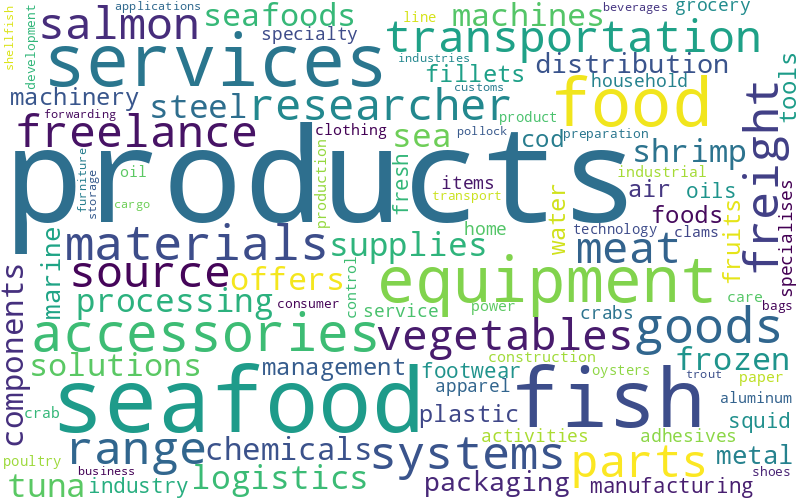

In [64]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))

draw_wordcloud(counter2, f"./top100.png")